# Scalar Timeseries

This draft notebook plots the melt rate timeseries.

Modified from Xylar's plotting script `plotMISOMIPOceanMetrics.py`.

In [1]:
#Load required packages
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import cftime
import cmocean as cm

from netCDF4 import Dataset
import os.path

Models: 
```
COCO   MITgcm-BAS          MITgcm-JPL  MOM6_SIGMA_ZSTAR  NEMO-CNRS      POP2x
FVCOM  MITgcm_BAS_Coupled  MOM6        MPAS-Ocean        NEMO-UKESM1is  ROMS-UTAS
```

In [2]:
## folder where the isomip-plus github repo is located
baserepo = '/g/data/x77/cy8964/isomip-plus/'
## folder where you downloaded the zipped Google Drive data
basedrive = '/g/data/x77/cy8964/ISOMIP+Data-new/'

# load the data from the text files, which point to the right location of the file in the drive structure
Ocean0_COM = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean0-COM.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean1_COM = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean1-COM.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean2_COM = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean2-COM.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean0_TYP = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean0-TYP.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean1_TYP = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean1-TYP.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean2_TYP = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean2-TYP.txt', dtype = 'str', delimiter = ',',usecols = 0)


# Scalar Timeseries

In [3]:
# set a cycling colour/linestyle, since the default only has 10 options

from cycler import cycler
cc = ( cycler(linestyle=['-', '--', '-.'])*cycler(color=['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00'])
     )
plt.rc('axes', prop_cycle=cc)

Ocean0_COM_COCO.GT0025.nc
Ocean0_COM_FVCOM.nc
Ocean0_COM_MITgcm_BAS.nc
Ocean0_COM_MITgcm_BAS_CoupledV3.nc
Ocean0_COM_MITgcm_JPL.nc
Ocean0_COM_MOM6_SIGMA_ZSTAR.nc
Ocean0_COM_MOM6.nc
Ocean0_COM_MPAS-Ocean.nc
Ocean0_COM_NEMO-CNRS.nc
Ocean0_COM_NEMO-UKESM1is.nc
Ocean0_COM_POP2x.nc
Ocean0_COM_ROMSUTAS.nc


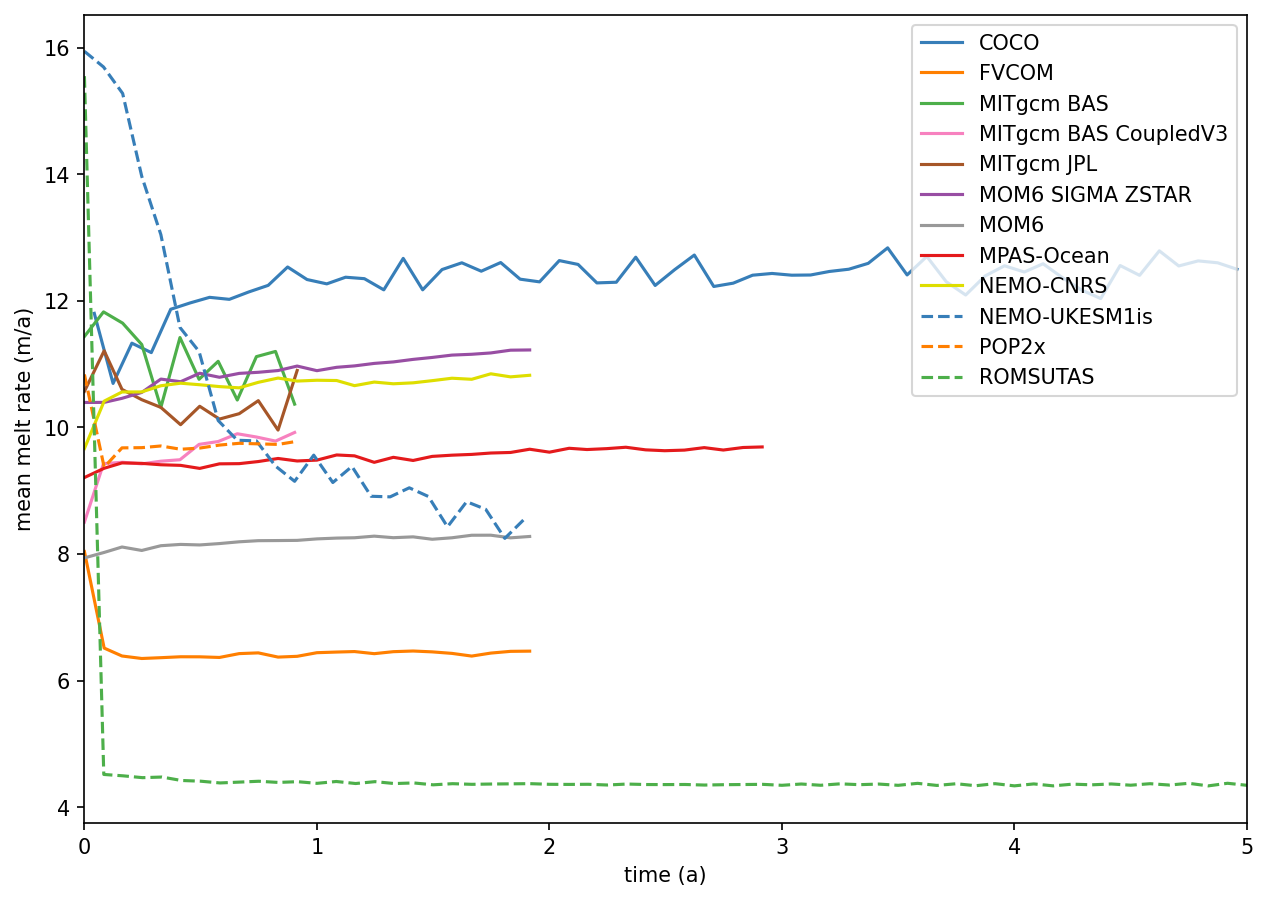

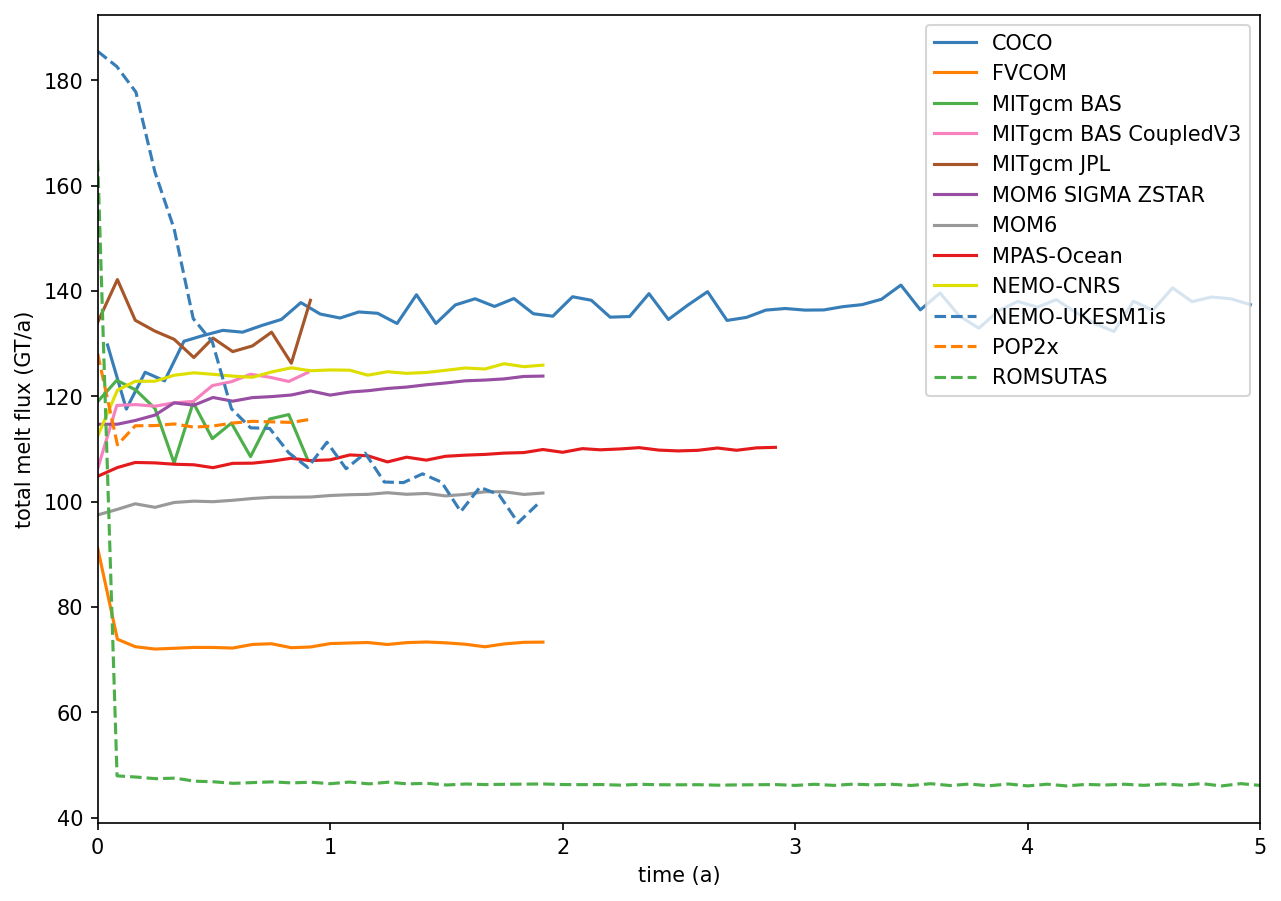

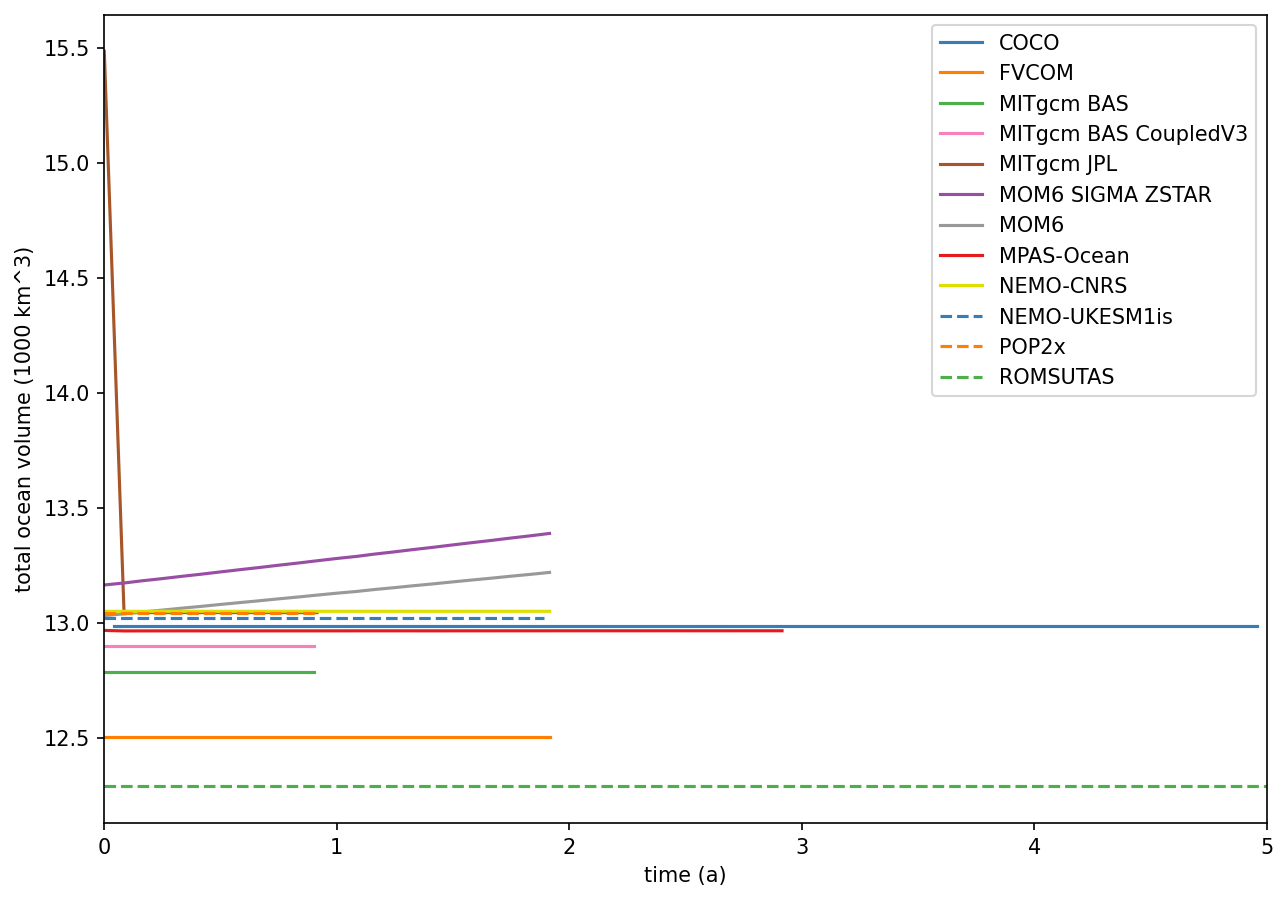

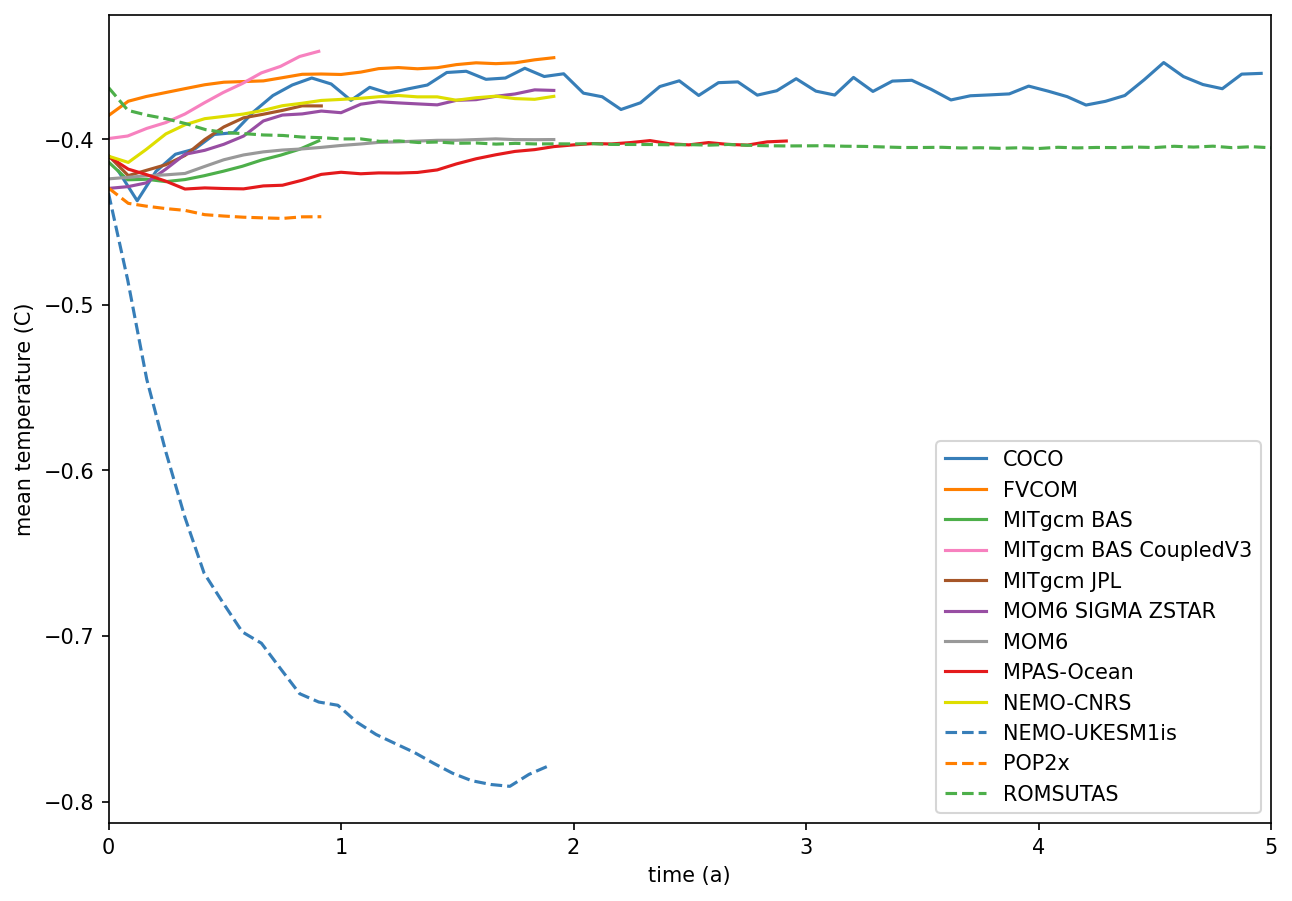

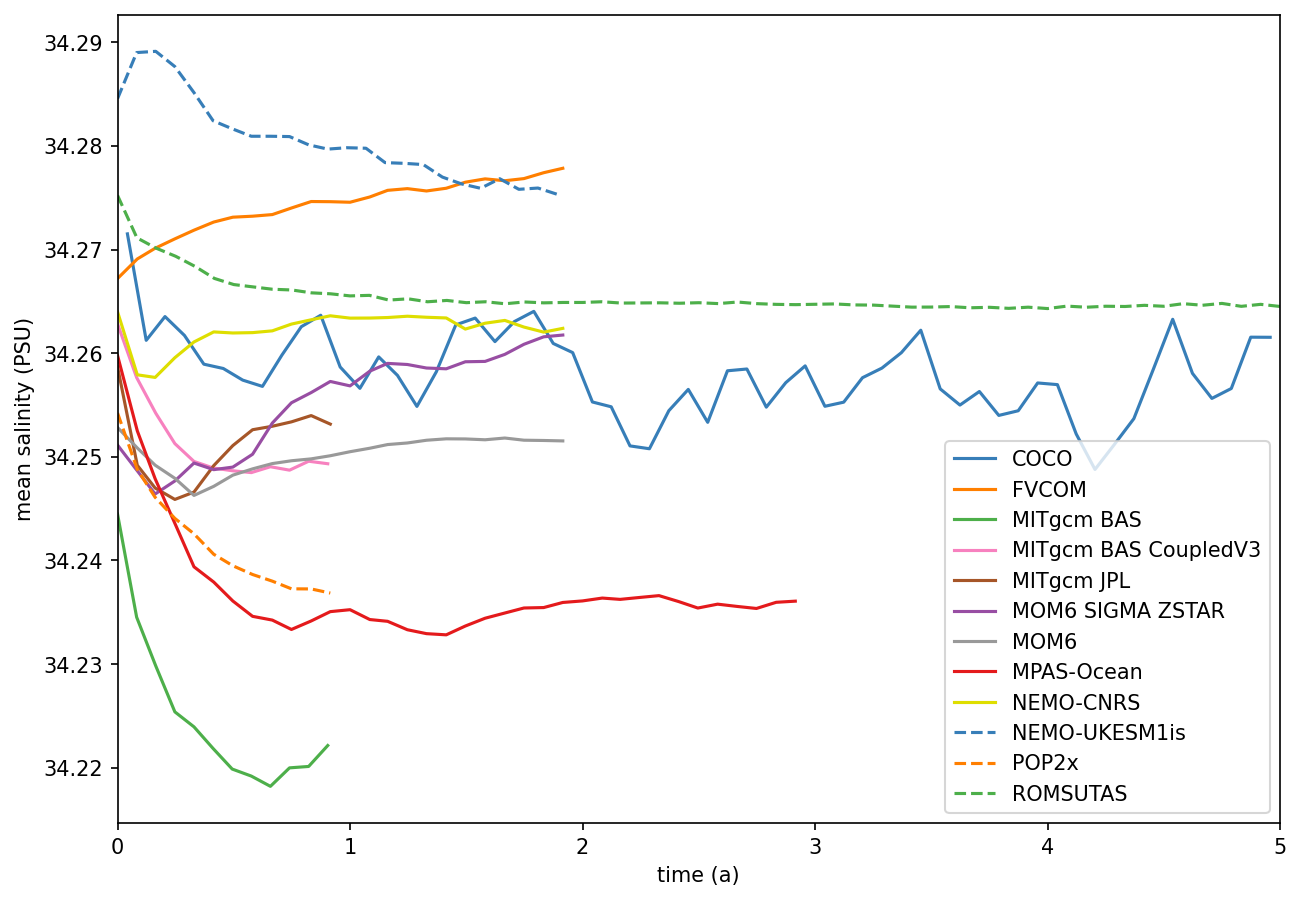

In [4]:
files = Ocean0_COM

#####

sPerYr = 365.*24.*60.*60.
GTPerKg = 1e-12

fieldNames = ['meanMeltRate', 'totalMeltFlux', 'totalOceanVolume',
              'meanTemperature', 'meanSalinity']
titles = ['mean melt rate (m/a)','total melt flux (GT/a)',
          'total ocean volume (1000 km^3)',
          'mean temperature (C)', 'mean salinity (PSU)']
semiLog = [False, False, False, False, False]
scales = [sPerYr, sPerYr*GTPerKg, 1e-12, 1., 1.]

for fileName in files:
  ncFile = Dataset(basedrive +fileName,'r')
  baseName = os.path.basename(basedrive +fileName)
  print(baseName)
  label = ' '.join(baseName.split('_')[2:]).split('.')[0]

  try:
    times = np.array(ncFile.variables['time'][:], dtype=float)/sPerYr
  except KeyError:
    # fill in missing time array with best guess
    nTime = len(ncFile.dimensions['nTime'])
    times = np.arange(nTime)/12.0

  for fIndex in range(len(fieldNames)):
    fieldName = fieldNames[fIndex]
    field = scales[fIndex]*np.array(ncFile.variables[fieldName][:], dtype=float)
    plt.figure(fIndex+1, figsize = (10,7),dpi=150)
    if(semiLog[fIndex]):
      plt.semilogy(times, field, label=label)
    else:
      plt.plot(times, field, label=label)
    
for fIndex in range(len(fieldNames)):
  plt.figure(fIndex+1)
  plt.xlabel('time (a)')
  plt.ylabel(titles[fIndex])
  plt.xlim(0,5)
  plt.legend()
  plt.draw()
  #plt.savefig('%s.png'%fieldNames[fIndex])
  #plt.savefig('%s.pdf'%fieldNames[fIndex])


Ocean1_COM_COCO.nc
Ocean1_COM_FVCOM.nc
Ocean1_COM_MITgcm_BAS.nc
Ocean1_COM_MITgcm_BAS_CoupledV3.nc
Ocean1_COM_MITgcm_JPL.nc
Ocean1_COM_MOM6_SIGMA_ZSTAR.nc
Ocean1_COM_MOM6.nc
Ocean1_COM_MPAS-Ocean.nc
Ocean1_COM_NEMO-CNRS.nc
Ocean1_COM_NEMO-UKESM1is.nc
Ocean1_COM_POP2x.nc
Ocean1_COM_ROMSUTAS.nc


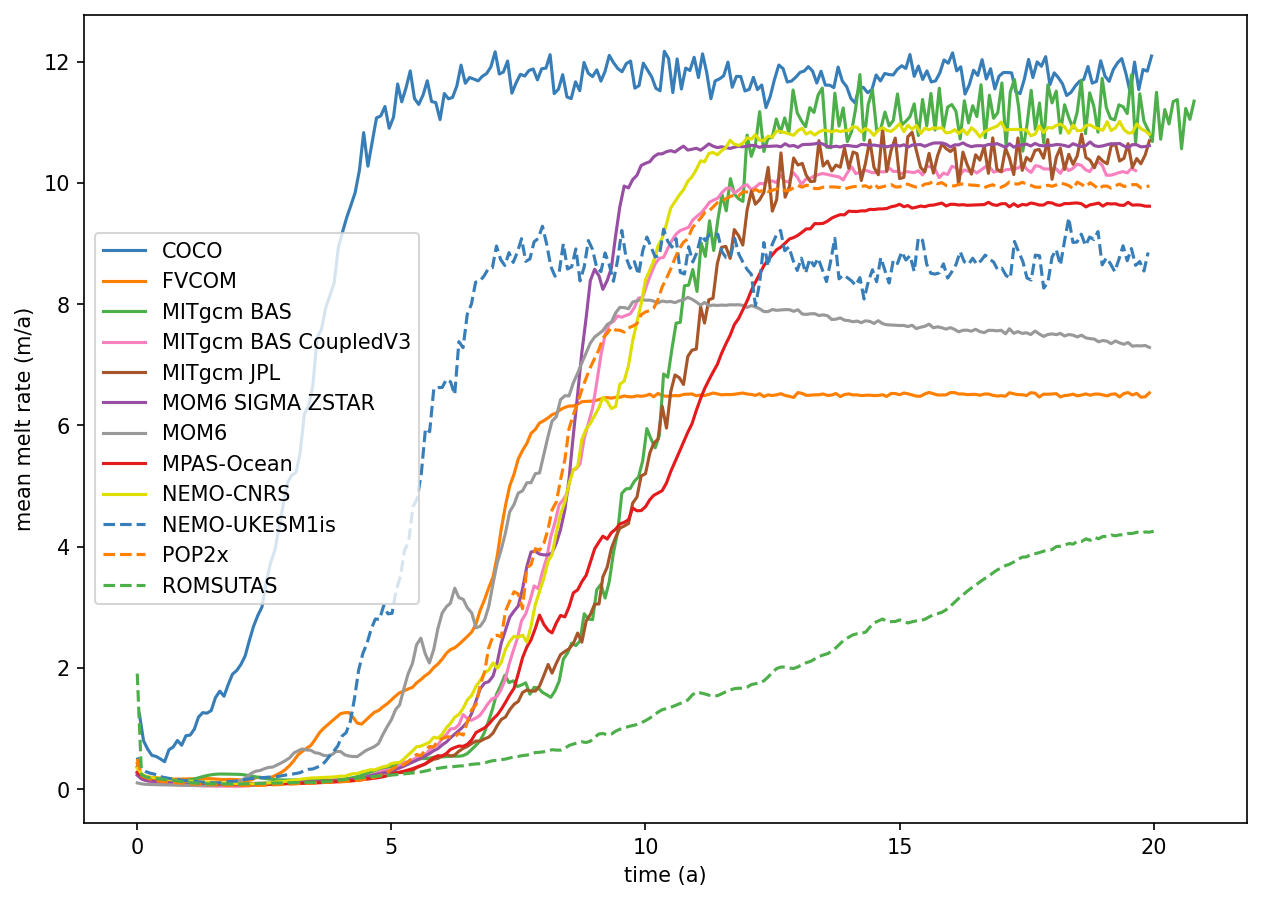

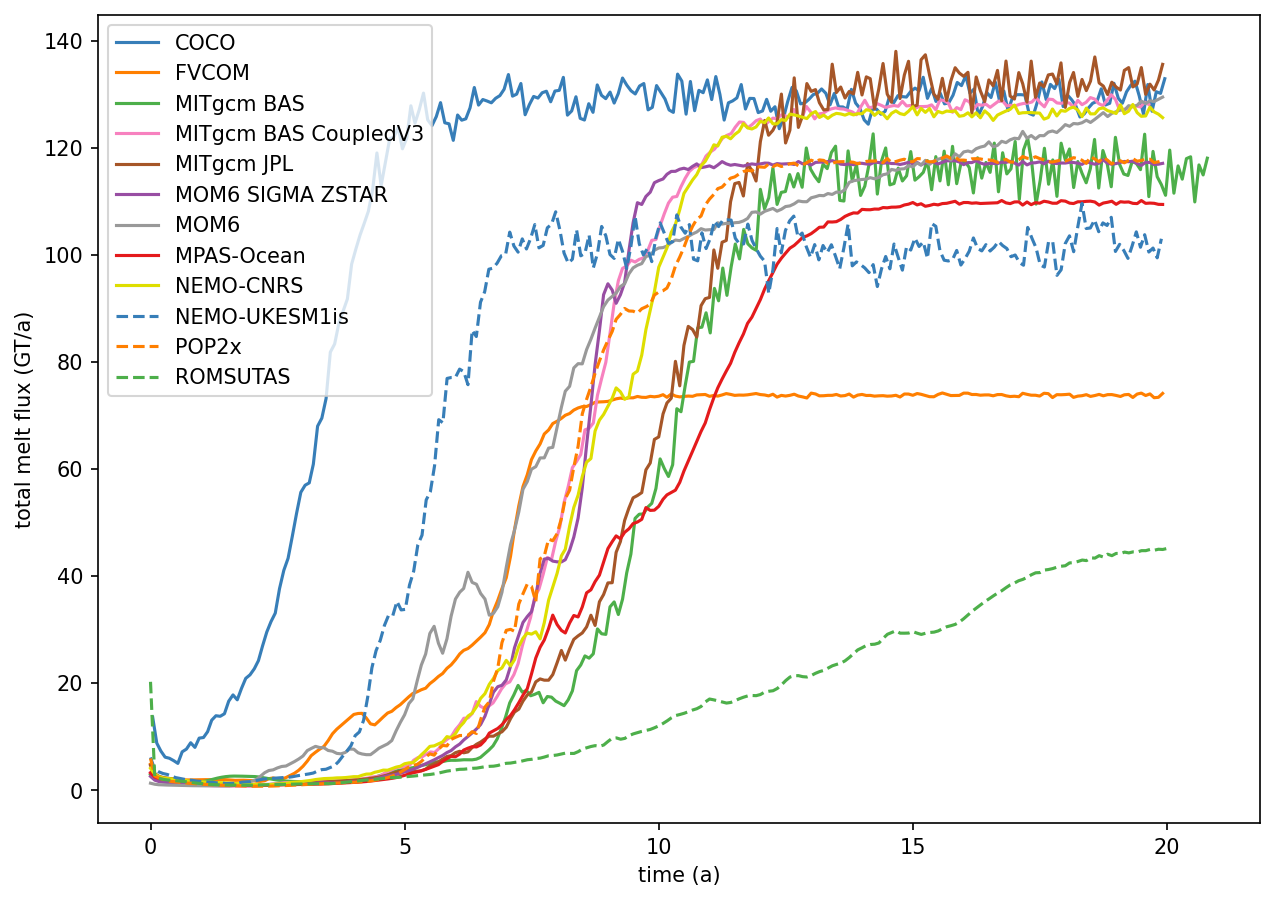

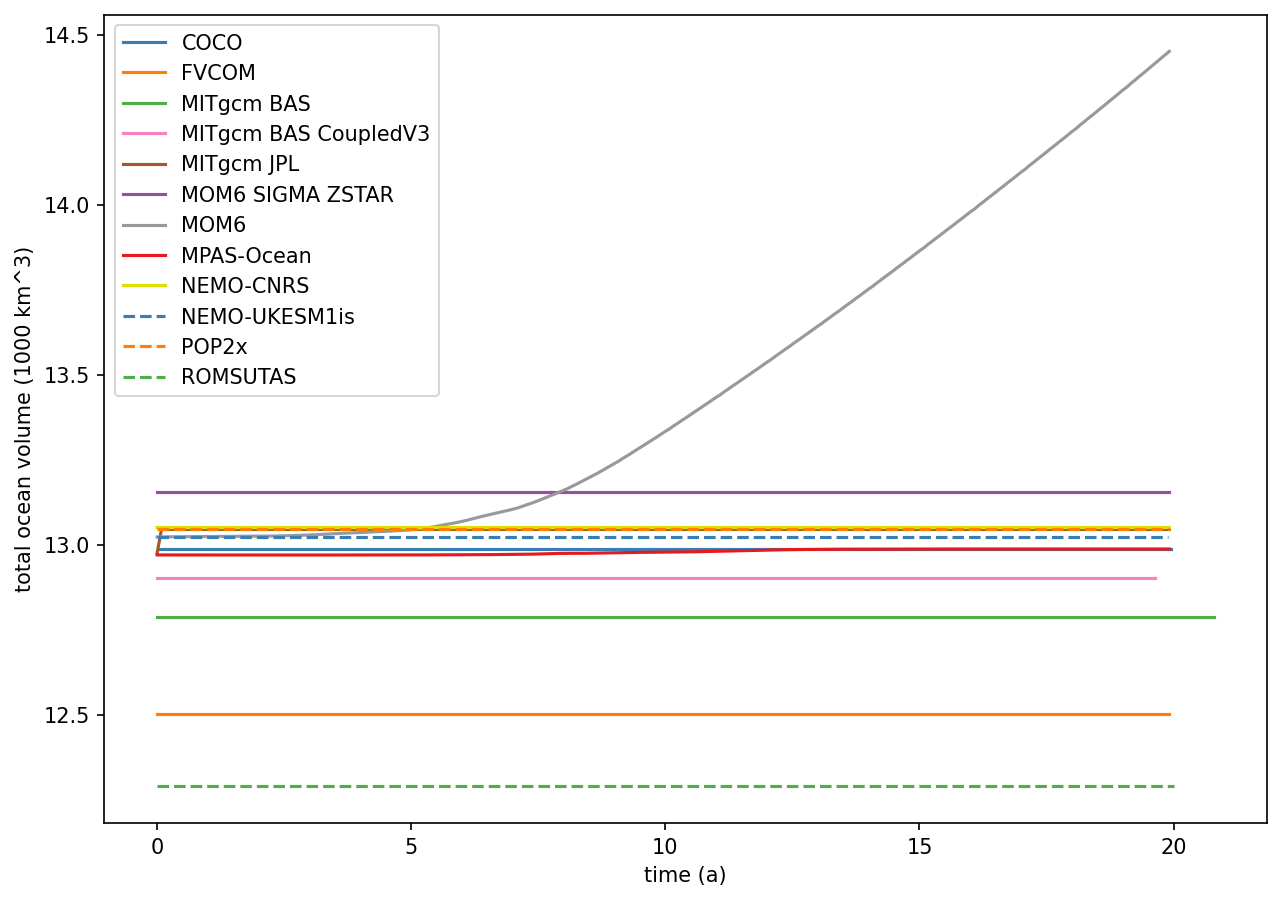

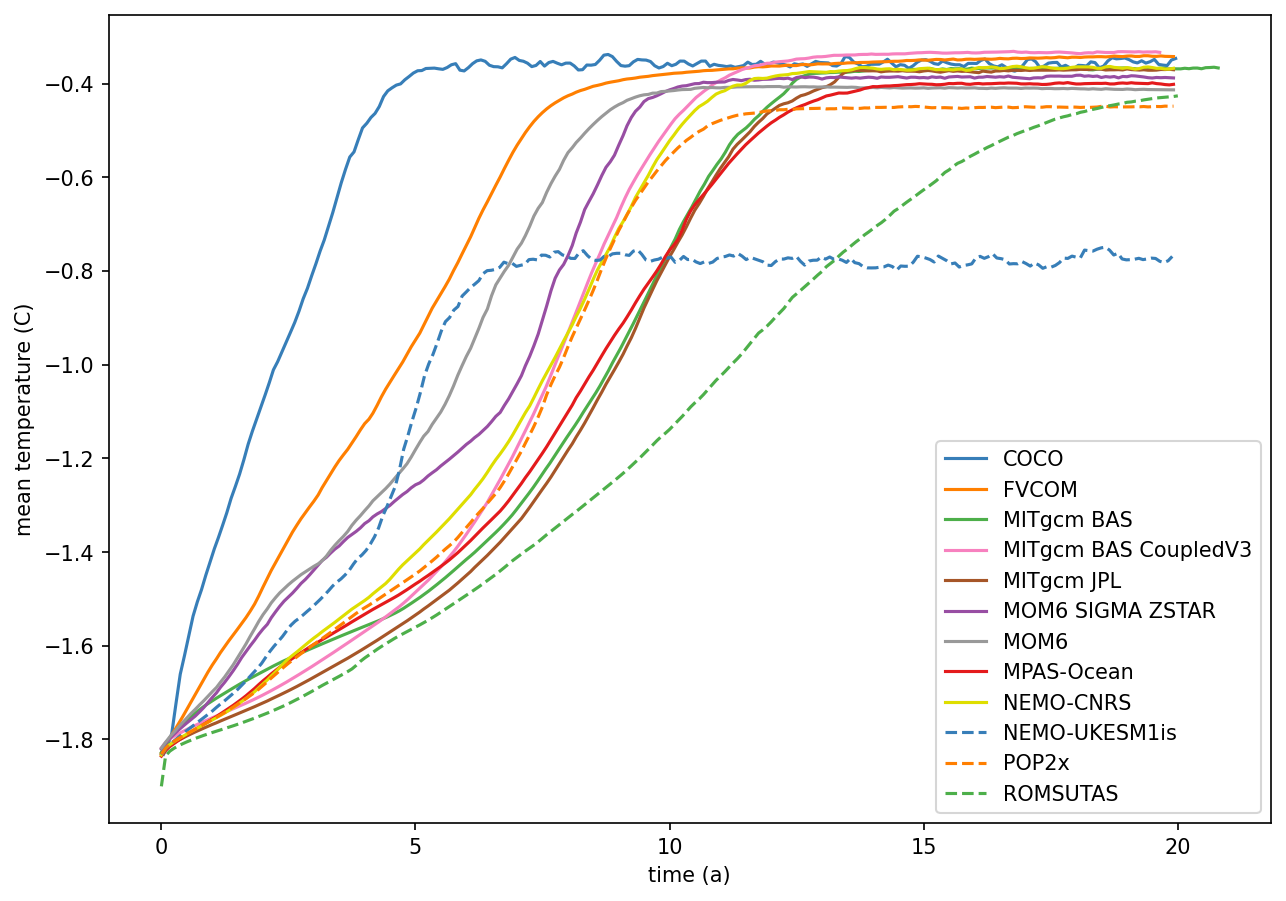

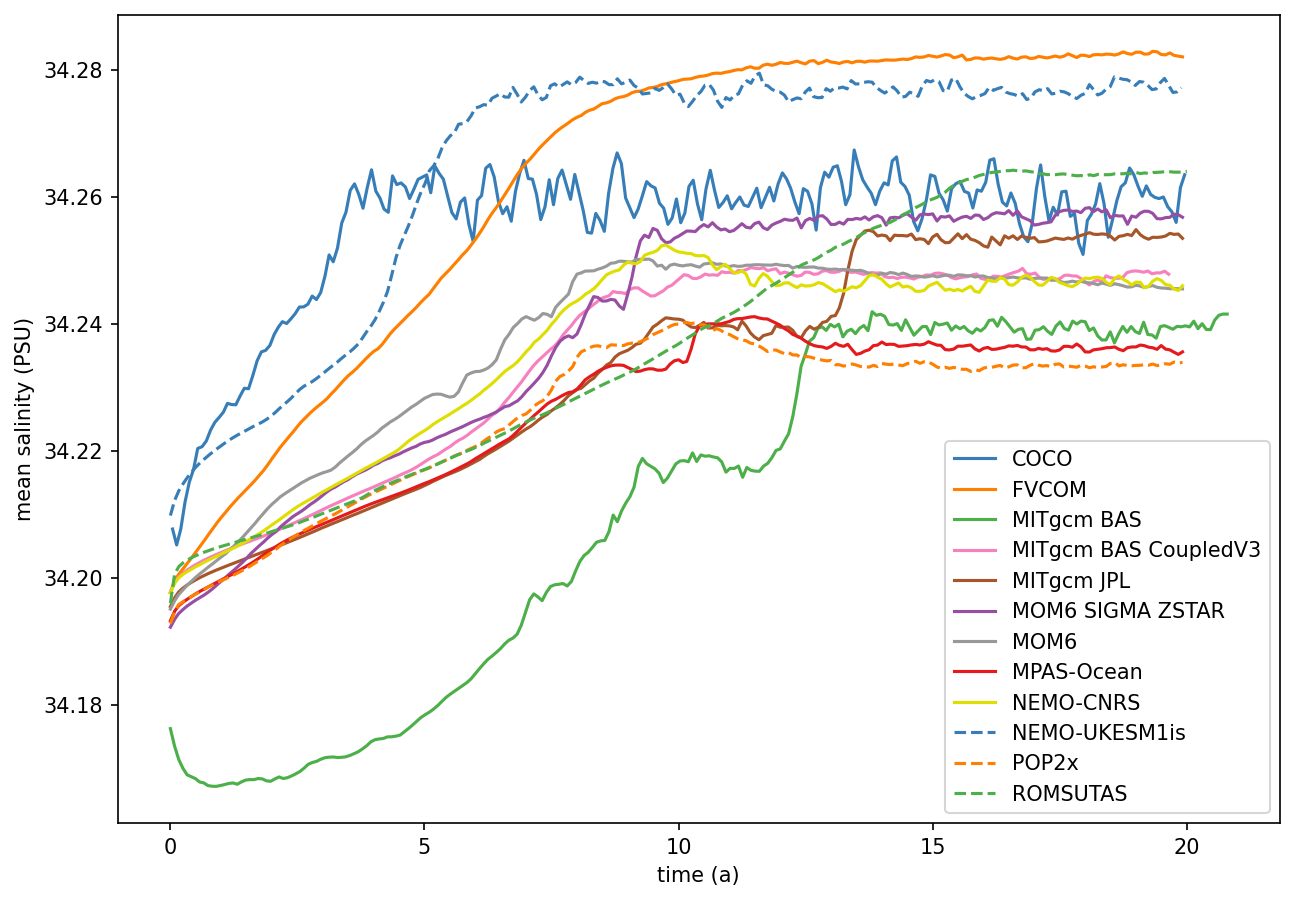

In [5]:
files = Ocean1_COM

#####

sPerYr = 365.*24.*60.*60.
GTPerKg = 1e-12

fieldNames = ['meanMeltRate', 'totalMeltFlux', 'totalOceanVolume',
              'meanTemperature', 'meanSalinity']
titles = ['mean melt rate (m/a)','total melt flux (GT/a)',
          'total ocean volume (1000 km^3)',
          'mean temperature (C)', 'mean salinity (PSU)']
semiLog = [False, False, False, False, False]
scales = [sPerYr, sPerYr*GTPerKg, 1e-12, 1., 1.]

for fileName in files:
  ncFile = Dataset(basedrive +fileName,'r')
  baseName = os.path.basename(basedrive +fileName)
  print(baseName)
  label = ' '.join(baseName.split('_')[2:]).split('.')[0]

  try:
    times = np.array(ncFile.variables['time'][:], dtype=float)/sPerYr
  except KeyError:
    # fill in missing time array with best guess
    nTime = len(ncFile.dimensions['nTime'])
    times = np.arange(nTime)/12.0

  for fIndex in range(len(fieldNames)):
    fieldName = fieldNames[fIndex]
    field = scales[fIndex]*np.array(ncFile.variables[fieldName][:], dtype=float)
    plt.figure(fIndex+1, figsize = (10,7),dpi=150)
    if(semiLog[fIndex]):
      plt.semilogy(times, field, label=label)
    else:
      plt.plot(times, field, label=label)
    
for fIndex in range(len(fieldNames)):
  plt.figure(fIndex+1)
  plt.xlabel('time (a)')
  plt.ylabel(titles[fIndex])
  #plt.xlim(0,5)
  plt.legend()
  plt.draw()
  #plt.savefig('%s.png'%fieldNames[fIndex])
  #plt.savefig('%s.pdf'%fieldNames[fIndex])


Ocean2_COM_COCO.nc
Ocean2_COM_FVCOM.nc
Ocean2_COM_MITgcm_BAS.nc
Ocean2_COM_MITgcm_BAS_CoupledV3.nc
Ocean2_COM_MITgcm_JPL.nc
Ocean2_COM_MOM6_SIGMA_ZSTAR.nc
Ocean2_COM_MOM6.nc
Ocean2_COM_MPAS-Ocean.nc
Ocean2_COM_NEMO-CNRS.nc
Ocean2_COM_NEMO-UKESM1is.nc
Ocean2_COM_POP2x.nc
Ocean2_COM_ROMSUTAS.nc


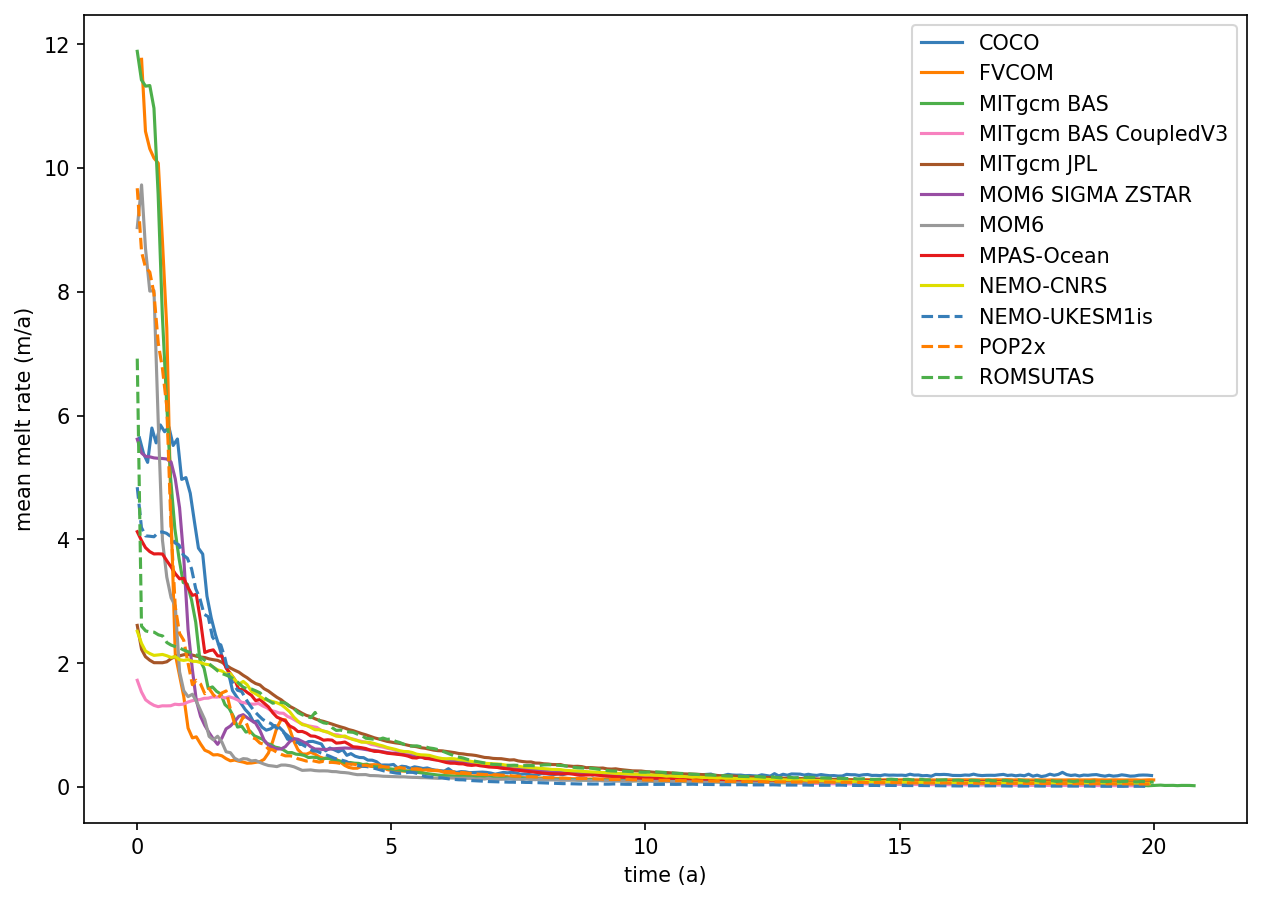

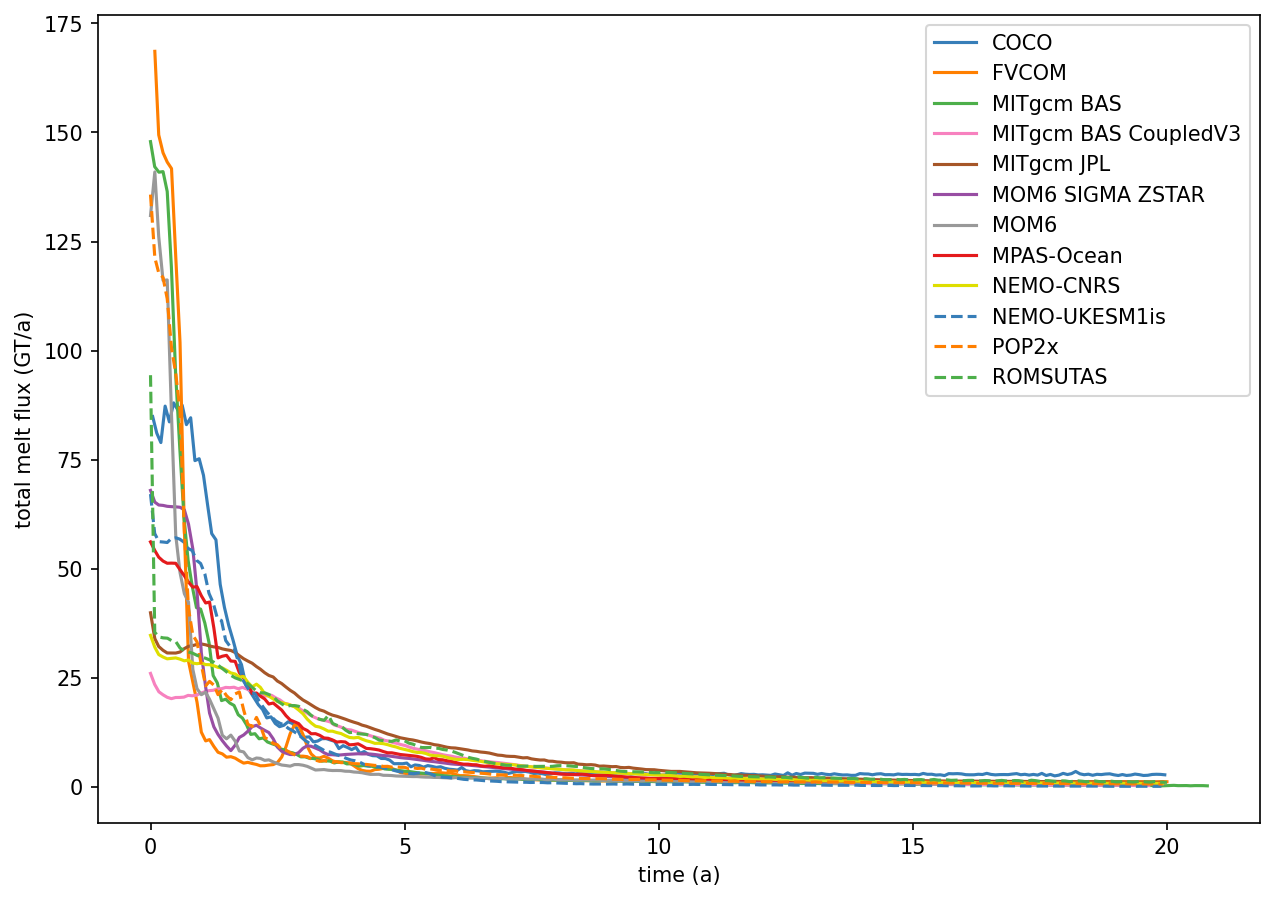

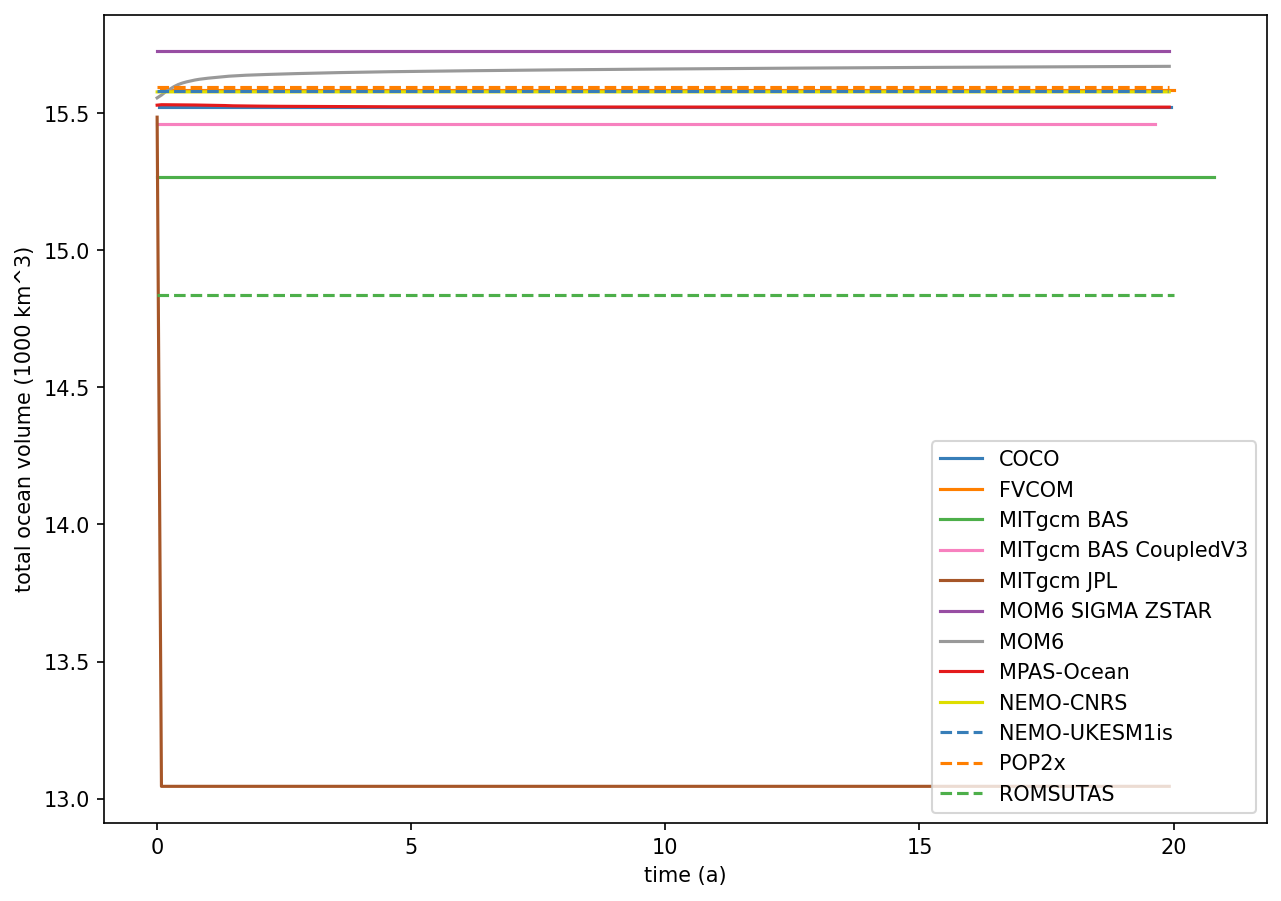

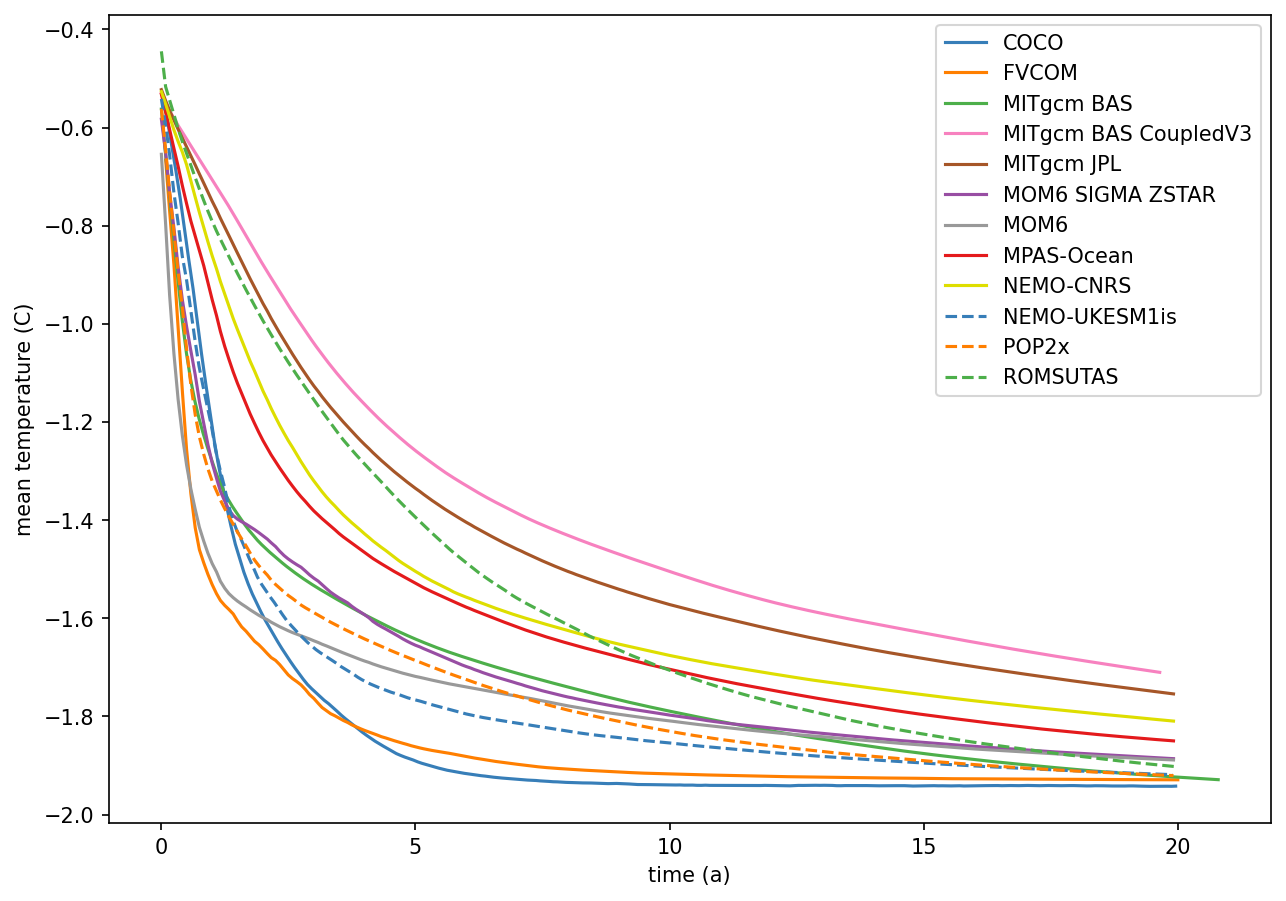

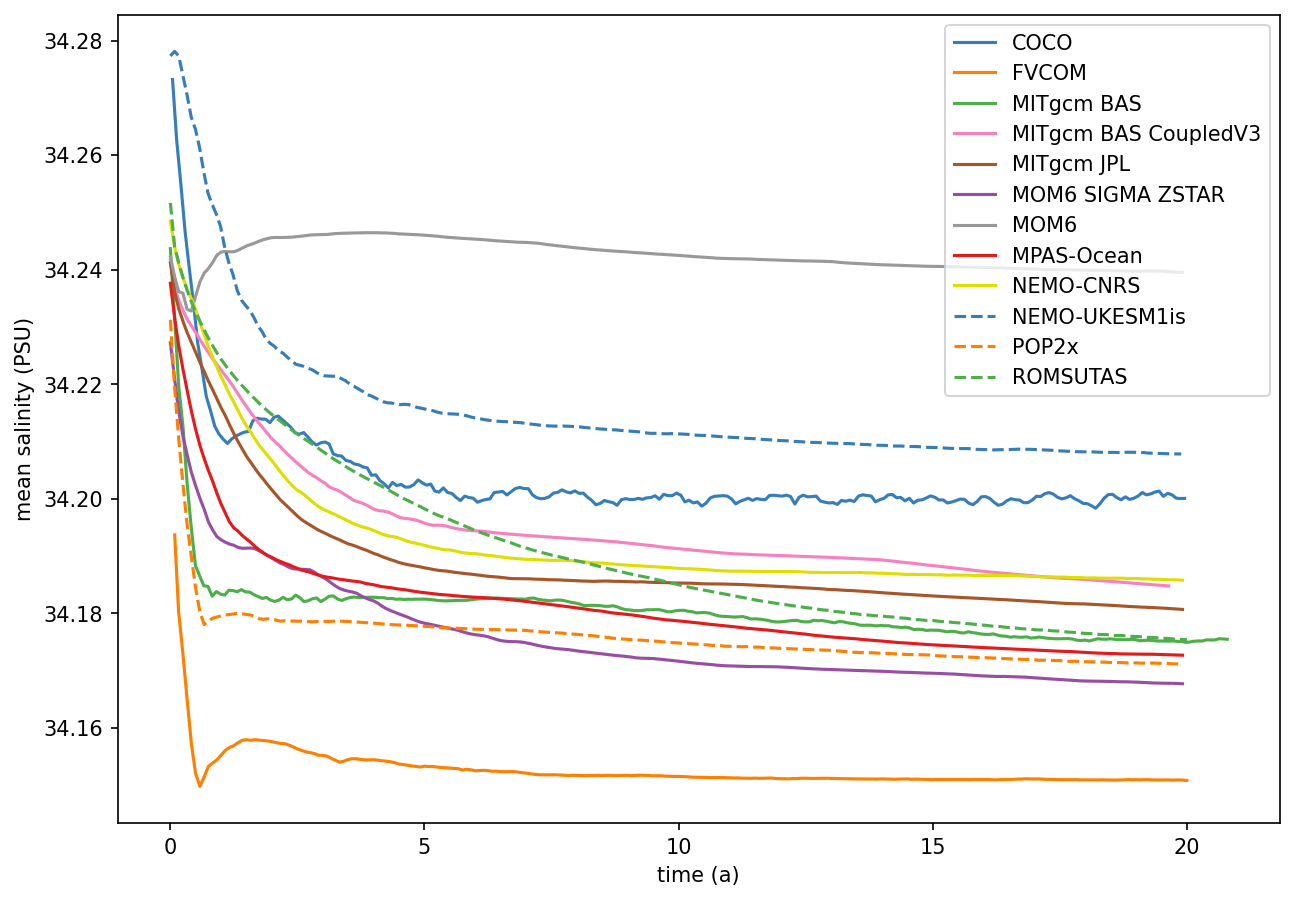

In [6]:
files = Ocean2_COM

#####

sPerYr = 365.*24.*60.*60.
GTPerKg = 1e-12

fieldNames = ['meanMeltRate', 'totalMeltFlux', 'totalOceanVolume',
              'meanTemperature', 'meanSalinity']
titles = ['mean melt rate (m/a)','total melt flux (GT/a)',
          'total ocean volume (1000 km^3)',
          'mean temperature (C)', 'mean salinity (PSU)']
semiLog = [False, False, False, False, False]
scales = [sPerYr, sPerYr*GTPerKg, 1e-12, 1., 1.]

for fileName in files:
  ncFile = Dataset(basedrive +fileName,'r')
  baseName = os.path.basename(basedrive +fileName)
  print(baseName)
  label = ' '.join(baseName.split('_')[2:]).split('.')[0]

  try:
    times = np.array(ncFile.variables['time'][:], dtype=float)/sPerYr
  except KeyError:
    # fill in missing time array with best guess
    nTime = len(ncFile.dimensions['nTime'])
    times = np.arange(nTime)/12.0

  for fIndex in range(len(fieldNames)):
    fieldName = fieldNames[fIndex]
    field = scales[fIndex]*np.array(ncFile.variables[fieldName][:], dtype=float)
    plt.figure(fIndex+1, figsize = (10,7),dpi=150)
    if(semiLog[fIndex]):
      plt.semilogy(times, field, label=label)
    else:
      plt.plot(times, field, label=label)
    
for fIndex in range(len(fieldNames)):
  plt.figure(fIndex+1)
  plt.xlabel('time (a)')
  plt.ylabel(titles[fIndex])
  #plt.xlim(0,5)
  plt.legend()
  plt.draw()
  #plt.savefig('%s.png'%fieldNames[fIndex])
  #plt.savefig('%s.pdf'%fieldNames[fIndex])
